In [1]:
yeast_p = "yeast.data"
import pandas as pd
yeast_initial = pd.read_csv(yeast_p, sep="\s+", decimal='.', header=None , names=['sequ_name', 'mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc', 'class_protein_localization'])
yeast = yeast_initial.copy()


In [2]:
yeast_f = open(yeast_p, "r")
lines = yeast_f.readlines()
yeast_f.close()

In [3]:
print("Number of rows in yeast df: ", yeast.shape)
print("Number of lines in yeast file: ", len(lines))

('Number of rows in yeast df: ', (1484, 10))
('Number of lines in yeast file: ', 1484)


In [4]:
#visual check that data has loaded correctly
print(yeast.head())
print("\n")
print(lines[0:5])
print("\n")
print(yeast.tail())
print("\n")
print(lines[1479:1483])

    sequ_name   mcg   gvh   alm   mit  erl  pox   vac   nuc  \
0  ADT1_YEAST  0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22   
1  ADT2_YEAST  0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22   
2  ADT3_YEAST  0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22   
3  AAR2_YEAST  0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.22   
4  AATM_YEAST  0.42  0.44  0.48  0.54  0.5  0.0  0.48  0.22   

  class_protein_localization  
0                        MIT  
1                        MIT  
2                        MIT  
3                        NUC  
4                        MIT  


['ADT1_YEAST  0.58  0.61  0.47  0.13  0.50  0.00  0.48  0.22  MIT\n', 'ADT2_YEAST  0.43  0.67  0.48  0.27  0.50  0.00  0.53  0.22  MIT\n', 'ADT3_YEAST  0.64  0.62  0.49  0.15  0.50  0.00  0.53  0.22  MIT\n', 'AAR2_YEAST  0.58  0.44  0.57  0.13  0.50  0.00  0.54  0.22  NUC\n', 'AATM_YEAST  0.42  0.44  0.48  0.54  0.50  0.00  0.48  0.22  MIT\n']


       sequ_name   mcg   gvh   alm   mit  erl  pox   vac   nuc  \
1479  YUR1_YEAST  0

In [5]:
#comparing value counts of target column with documentation
print(yeast['class_protein_localization'].value_counts())
print("\n")
print("Total number of counts: ", yeast['class_protein_localization'].value_counts().sum())

CYT    463
NUC    429
MIT    244
ME3    163
ME2     51
ME1     44
EXC     35
VAC     30
POX     20
ERL      5
Name: class_protein_localization, dtype: int64


('Total number of counts: ', 1484)


In [6]:
#confirm no missing values
print(yeast.isna().sum())

sequ_name                     0
mcg                           0
gvh                           0
alm                           0
mit                           0
erl                           0
pox                           0
vac                           0
nuc                           0
class_protein_localization    0
dtype: int64


In [7]:
yeast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 10 columns):
sequ_name                     1484 non-null object
mcg                           1484 non-null float64
gvh                           1484 non-null float64
alm                           1484 non-null float64
mit                           1484 non-null float64
erl                           1484 non-null float64
pox                           1484 non-null float64
vac                           1484 non-null float64
nuc                           1484 non-null float64
class_protein_localization    1484 non-null object
dtypes: float64(8), object(2)
memory usage: 116.0+ KB


In [8]:
#sanity check step 1 - values have been normalized to between 0.0 and 1.0 - check between 0 and 1.0
#refer to Paper?????
yeast.describe()

,mcg,gvh,alm,mit,erl,pox,vac,nuc
count,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000
mean,0.500121,0.499933,0.500034,0.261186,0.504717,0.007500,0.499885,0.276199
std,0.137299,0.123924,0.086670,0.137098,0.048351,0.075683,0.057797,0.106491
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.580000,0.570000,0.550000,0.320000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,1.000000


In [9]:
#sanity check step 2 - remove redundant entries in dataset, ie. repeated protein sequences using SWISS-PROT database reference
#these will skew data (see Paper?????)
#exploring SWISS_PROT sequence name column - almost no repetition. 
#This column provides a way to reference each protein sequence analysed on the SWISS-PROT database.

print(yeast['sequ_name'].value_counts())

for entry in yeast['sequ_name']:
    sequ_value_counts = yeast['sequ_name'].value_counts()
    if sequ_value_counts[entry] == 2:
        mask_sequ_entry = yeast['sequ_name'] == entry
        print(yeast.loc[mask_sequ_entry])
        
yeast_clean = yeast.drop_duplicates()
print(yeast_clean['sequ_name'].value_counts()) 
print('\n')
print(yeast_clean.shape)

RL44_YEAST    2
RS41_YEAST    2
RS28_YEAST    2
RS4E_YEAST    2
RS22_YEAST    2
RL12_YEAST    2
RL19_YEAST    2
RL35_YEAST    2
H3_YEAST      2
RL1A_YEAST    2
RL18_YEAST    2
RS24_YEAST    2
MAT2_YEAST    2
EF1A_YEAST    2
RLUB_YEAST    2
RL2_YEAST     2
RL41_YEAST    2
H4_YEAST      2
MTC_YEAST     2
RS8_YEAST     2
RL15_YEAST    2
IF4A_YEAST    2
SPT5_YEAST    1
CYC1_YEAST    1
UBA1_YEAST    1
YHY0_YEAST    1
STH1_YEAST    1
YBY2_YEAST    1
KEM1_YEAST    1
SOF1_YEAST    1
             ..
PT17_YEAST    1
G6PI_YEAST    1
ARF2_YEAST    1
SUG1_YEAST    1
SCA1_YEAST    1
MT17_YEAST    1
ATC2_YEAST    1
PR09_YEAST    1
RAP1_YEAST    1
PR04_YEAST    1
MET4_YEAST    1
RS31_YEAST    1
YIR3_YEAST    1
PCNA_YEAST    1
PR02_YEAST    1
TSL1_YEAST    1
SYAC_YEAST    1
YB30_YEAST    1
CC40_YEAST    1
PRCZ_YEAST    1
SP10_YEAST    1
COXA_YEAST    1
PEP8_YEAST    1
UCR2_YEAST    1
POB1_YEAST    1
MBP1_YEAST    1
KC21_YEAST    1
YN70_YEAST    1
MA3R_YEAST    1
ATP7_YEAST    1
Name: sequ_name, Length:

In [10]:
#erl is stated to be a binary attribute - apparently indicated by 1.0, or 0.5
print(yeast_clean["erl"].value_counts())

0.5    1448
1.0      14
Name: erl, dtype: int64


In [11]:
print(yeast_clean["pox"].value_counts())

0.00    1447
0.83      11
0.50       4
Name: pox, dtype: int64


In [12]:
#create another copy of yeast DataFrame without 'POX' and 'ERL' localizations
yeast_mini = yeast_clean.copy()
yeast_mini.drop(yeast_mini.loc[yeast_mini['class_protein_localization']=='ERL'].index, inplace=True)
yeast_mini.drop(yeast_mini.loc[yeast_mini['class_protein_localization']=='POX'].index, inplace=True)
yeast_mini.shape
#df.drop(df.loc[df['line_race']==0].index, inplace=True)

(1437, 10)

In [13]:
#split dataframe into target (a Series), and data (a dataframe named yeast_data)
target = yeast_clean["class_protein_localization"]
print("Target:")
print(type(target))
print("\n")
print(target.head())
print("\n")
print("Data:")
yeast_data = yeast_clean.drop(["class_protein_localization", "sequ_name"], axis=1)
print(yeast_data.head())

Target:
<class 'pandas.core.series.Series'>


0    MIT
1    MIT
2    MIT
3    NUC
4    MIT
Name: class_protein_localization, dtype: object


Data:
    mcg   gvh   alm   mit  erl  pox   vac   nuc
0  0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22
1  0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22
2  0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22
3  0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.22
4  0.42  0.44  0.48  0.54  0.5  0.0  0.48  0.22


In [14]:
#split yeast_mini dataframe into target (a Series), and data (a dataframe named yeast_data)
target_mini = yeast_mini["class_protein_localization"]
print("Target:")
print(type(target_mini))
print("\n")
print(target_mini.head())
print("\n")
print("Data:")
yeast_data_mini = yeast_mini.drop(["class_protein_localization", "sequ_name"], axis=1)
print(yeast_data_mini.head())

Target:
<class 'pandas.core.series.Series'>


0    MIT
1    MIT
2    MIT
3    NUC
4    MIT
Name: class_protein_localization, dtype: object


Data:
    mcg   gvh   alm   mit  erl  pox   vac   nuc
0  0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22
1  0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22
2  0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22
3  0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.22
4  0.42  0.44  0.48  0.54  0.5  0.0  0.48  0.22


### A bit of EDA

mcg


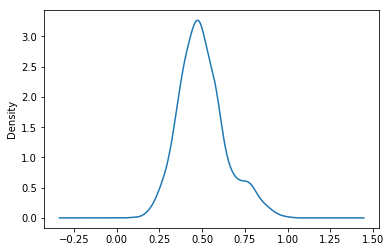

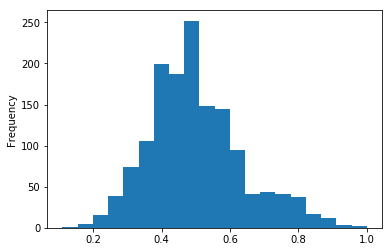

gvh


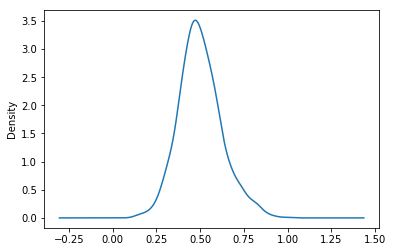

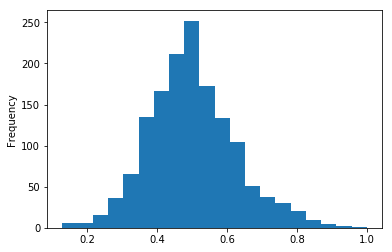

alm


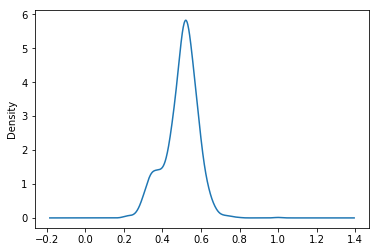

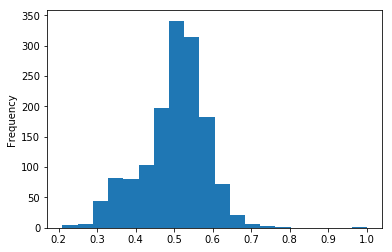

mit


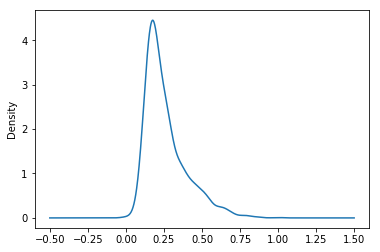

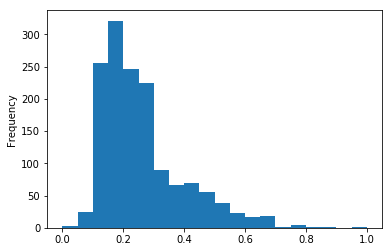

erl


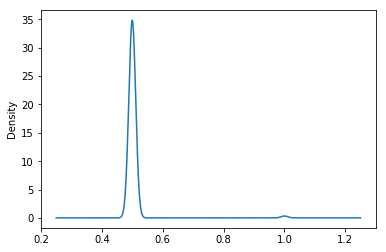

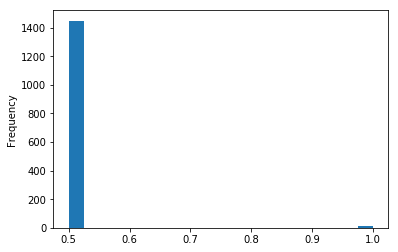

pox


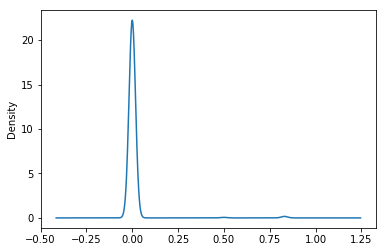

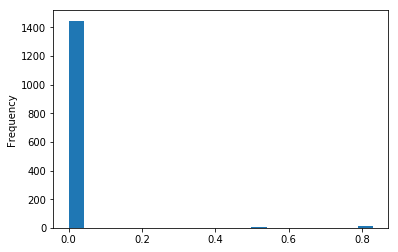

vac


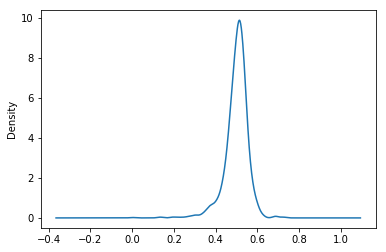

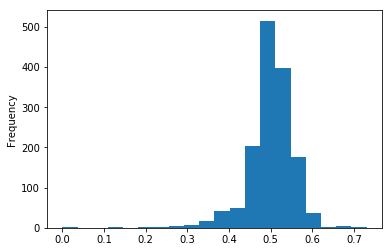

nuc


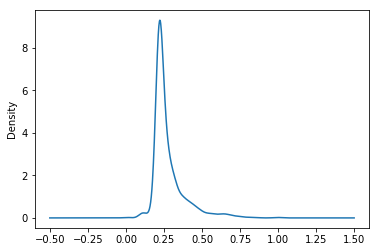

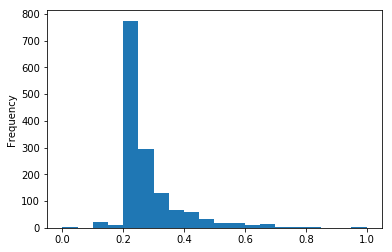

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
cols = yeast_data.columns

for c in cols:
    print(c)
    yeast_data[c].plot(kind='density')
    plt.show()
    yeast_data[c].plot(kind='hist', bins=20)
    plt.show()

mcg


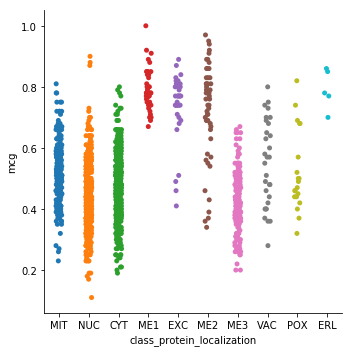

gvh


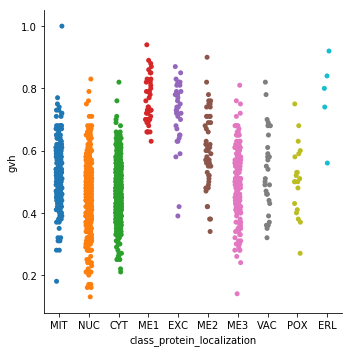

alm


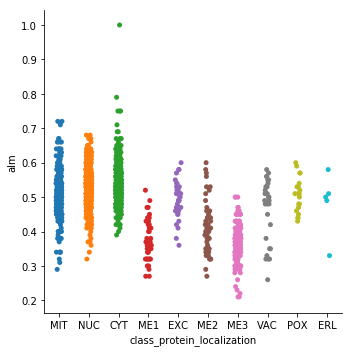

mit


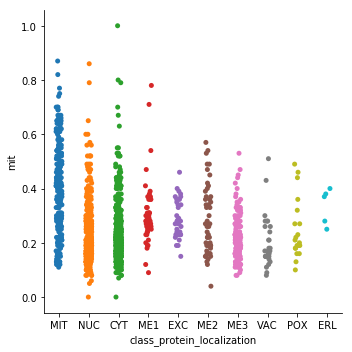

erl


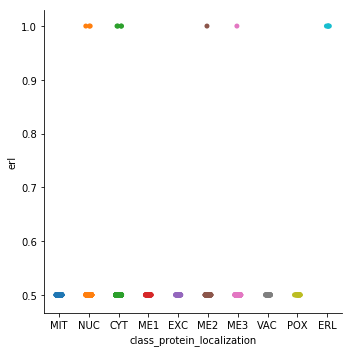

pox


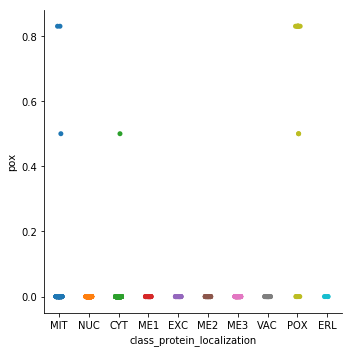

vac


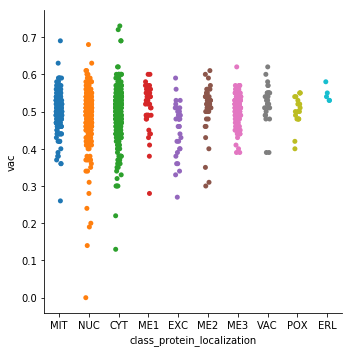

nuc


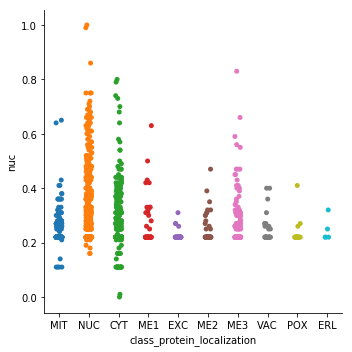

In [17]:
import seaborn as sns
for c in cols:
    print(c)
    sns.catplot(x='class_protein_localization', y=c, data=yeast_clean)
    plt.show()

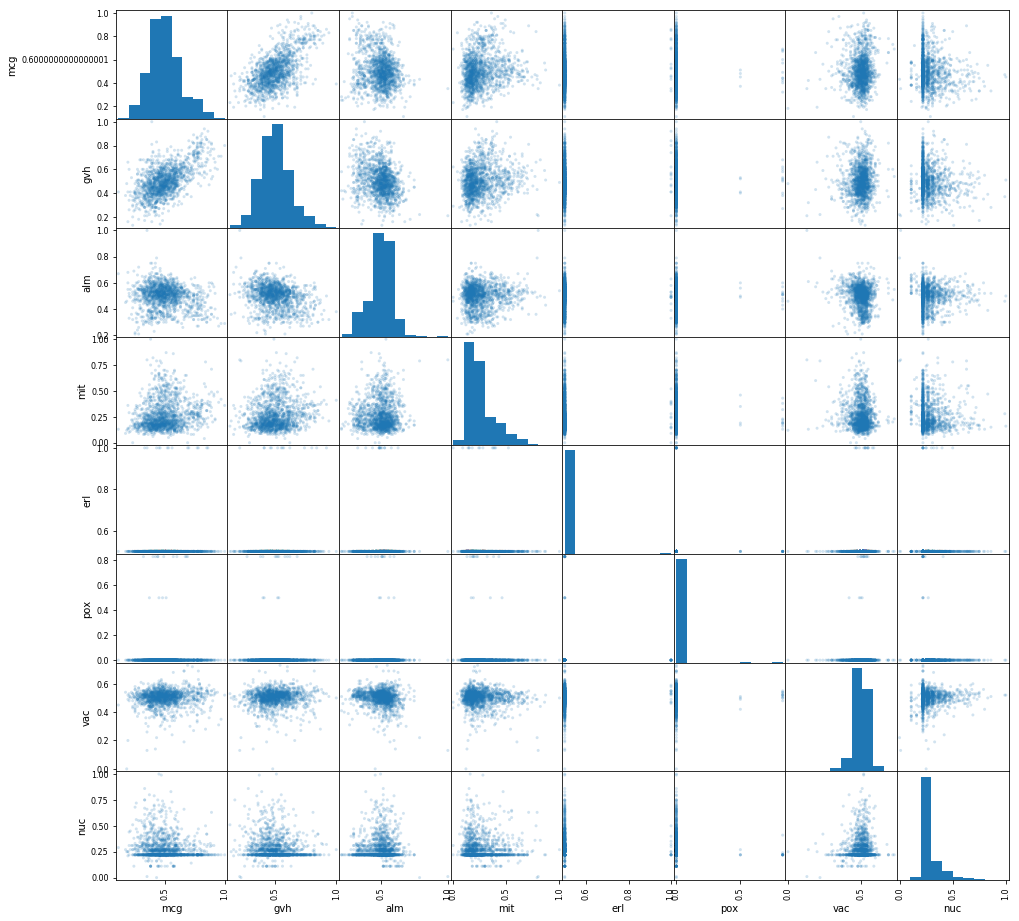

In [18]:
from pandas.plotting import scatter_matrix
scatter_matrix(yeast_clean, alpha = 0.2, figsize=(16,16), diagonal='hist')
plt.show()

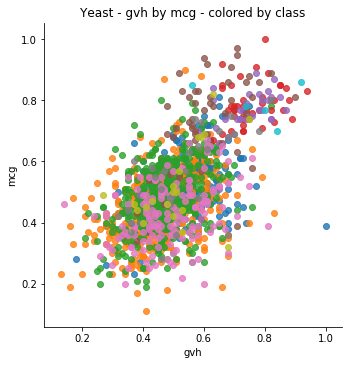

In [19]:

sns.lmplot( x="gvh", y="mcg", data=yeast_clean, fit_reg=False, hue='class_protein_localization', legend=False)
plt.title("Yeast - gvh by mcg - colored by class")
plt.show() 

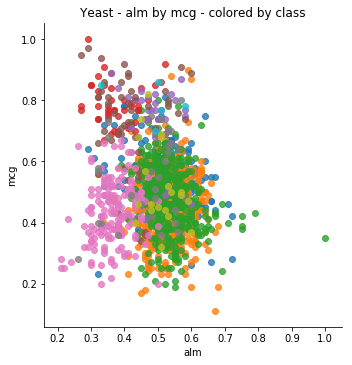

In [20]:
sns.lmplot( x="alm", y="mcg", data=yeast_clean, fit_reg=False, hue='class_protein_localization', legend=False)
plt.title("Yeast - alm by mcg - colored by class")
plt.show() 

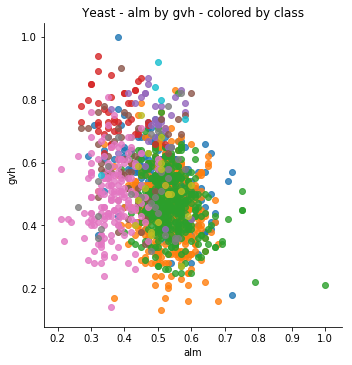

In [21]:
sns.lmplot( x="alm", y="gvh", data=yeast_clean, fit_reg=False, hue='class_protein_localization', legend=False)
plt.title("Yeast - alm by gvh - colored by class")
plt.show() 

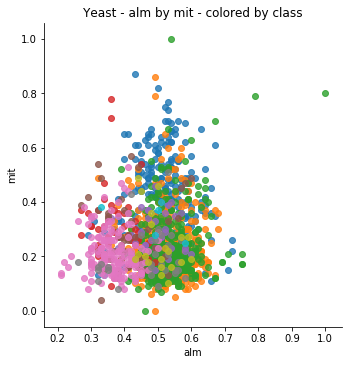

In [22]:
sns.lmplot( x="alm", y="mit", data=yeast_clean, fit_reg=False, hue='class_protein_localization', legend=False)
plt.title("Yeast - alm by mit - colored by class")
plt.show() 

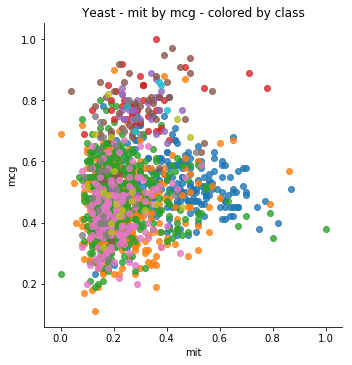

In [23]:
sns.lmplot( x="mit", y="mcg", data=yeast_clean, fit_reg=False, hue='class_protein_localization', legend=False)
plt.title("Yeast - mit by mcg - colored by class")
plt.show() 

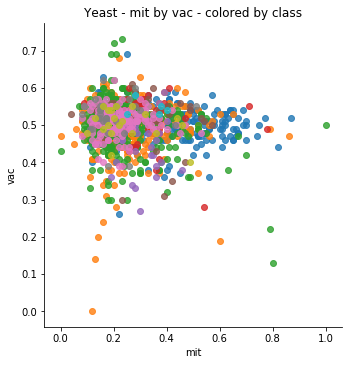

In [24]:
sns.lmplot( x="mit", y="vac", data=yeast_clean, fit_reg=False, hue='class_protein_localization', legend=False)
plt.title("Yeast - mit by vac - colored by class")
plt.show() 

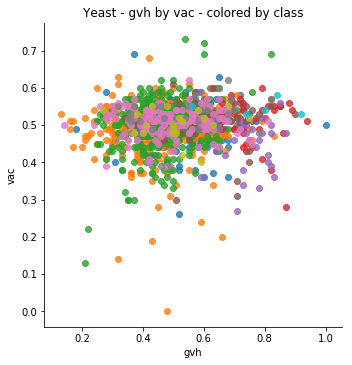

In [25]:
sns.lmplot( x="gvh", y="vac", data=yeast_clean, fit_reg=False, hue='class_protein_localization', legend=False)
plt.title("Yeast - gvh by vac - colored by class")
plt.show() 

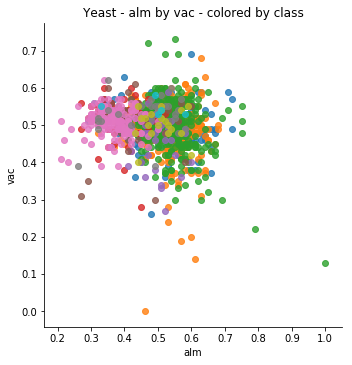

In [26]:
sns.lmplot( x="alm", y="vac", data=yeast_clean, fit_reg=False, hue='class_protein_localization', legend=False)
plt.title("Yeast - alm by vac - colored by class")
plt.show() 

## Task 3 - Data Modelling - Classification - kNN

### Training/testing split - 50:50

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

In [28]:

X_train, X_test, y_train, y_test = train_test_split(yeast_data, target, test_size=0.50, random_state=0)

def train_test_check(X_train, X_test, y_train, y_test):
    '''
    Enables checking for correct data loading into train_test_split by means of a number of print outs.
    '''
    print("X training set:")
    print(X_train.head())
    print(X_train.shape)
    print('\n')
    print("y training set:")
    print(y_train.head())
    print(y_train.shape)
    print('\n')
    print("X test set:")
    print(X_test.head())
    print(X_test.shape)
    print('\n')
    print("y test set:")
    print(y_test.head())
    print(y_test.shape)
    print('\n')
    # check split of specific target categories, in particular for categories with small representation in initial yeast dataset
    print("Value counts for target values in training set:")
    print(y_train.value_counts())
    print('\n')
    print("Value counts for target values in test set:")
    print(y_test.value_counts())

#### Exploring parameters of KNeighborsClassifier

In [29]:
# what is most important in this problem - precision or recall or F1??
# try with different values of k  - find best value of k according to accuracy (least number of incorrect predictions)
def k_Opt(X_train, X_test, y_train, y_test, smallest_k, biggest_k):
    '''
    Inputs a number of different k values to find optimal accuracy score. Returns k for optimal score.
    ''' 
    maxK = 1
    maxAccuracy = 0.0
    for k in range(smallest_k, biggest_k):
        clf = KNeighborsClassifier(k)
        clf.fit(X_train, y_train)
        accuracy = clf.score(X_test, y_test)
        y_pre = clf.predict(X_test)
        if accuracy > maxAccuracy:
            maxAccuracy = accuracy
            maxK = k
            cm = pd.DataFrame(confusion_matrix(y_test, y_pre, labels=['MIT', 'NUC', 'CYT', 'ME1', 'EXC', 'ME2', 'ME3', 'VAC', 'POX', 'ERL']), index=['true:MIT', 'true:NUC', 'true:CYT', 'true:ME1', 'true:EXC', 'true:ME2', 'true:ME3', 'true:VAC', 'true:POX', 'true:ERL'], columns=['pred:MIT', 'pred:NUC', 'pred:CYT', 'pred:ME1', 'pred:EXC', 'pred:ME2', 'pred:ME3', 'pred:VAC', 'pred:POX', 'pred:ERL'])
    print("Maximum accuracy: ", maxAccuracy)
    print("k value for maximum accuracy: ", k)
    print('\n')
    print(cm)
    return maxK
    
maxK = k_Opt(X_train, X_test, y_train, y_test, 2, 19)

('Maximum accuracy: ', 0.573187414500684)
('k value for maximum accuracy: ', 18)


          pred:MIT  pred:NUC  pred:CYT  pred:ME1  pred:EXC  pred:ME2  \
true:MIT        66         9        30         0         2         2   
true:NUC        10       110        88         0         0         0   
true:CYT        15        55       145         0         1         2   
true:ME1         1         0         0        20         4         1   
true:EXC         3         0         2         2        13         0   
true:ME2         7         1         6         3         2         4   
true:ME3         5         8        11         0         0         0   
true:VAC         0         1         8         0         1         1   
true:POX         6         0         6         0         0         0   
true:ERL         0         0         0         0         1         2   

          pred:ME3  pred:VAC  pred:POX  pred:ERL  
true:MIT         4         0         0         0  
true:NUC         5    

In [30]:
# using maxK from previous section, explore different values of p using weight set to distance
def p_Opt(X_train, X_test, y_train, y_test, smallest_p, biggest_p, maxK):
    '''
    Inputs a number of different p values to find optimal accuracy score. Returns p for optimal score. 
    Uses weights='distance'
    '''
    #initial maxP is equal to 2 as that is the default used in KNeighborsClassifier.
    maxP = 2
    maxAccuracy = 0.0
    for p in range(smallest_p, biggest_p):
        clf = KNeighborsClassifier(maxK, weights='distance', p=p)
        clf.fit(X_train, y_train)
        accuracy = clf.score(X_test, y_test)
        y_pre = clf.predict(X_test)
        if accuracy > maxAccuracy:
            maxAccuracy = accuracy
            maxP = p
            cm = pd.DataFrame(confusion_matrix(y_test, y_pre, labels=['MIT', 'NUC', 'CYT', 'ME1', 'EXC', 'ME2', 'ME3', 'VAC', 'POX', 'ERL']), index=['true:MIT', 'true:NUC', 'true:CYT', 'true:ME1', 'true:EXC', 'true:ME2', 'true:ME3', 'true:VAC', 'true:POX', 'true:ERL'], columns=['pred:MIT', 'pred:NUC', 'pred:CYT', 'pred:ME1', 'pred:EXC', 'pred:ME2', 'pred:ME3', 'pred:VAC', 'pred:POX', 'pred:ERL'])
    print("Maximum accuracy: ", maxAccuracy)
    print("p value for maximum accuracy: ", p)
    print('\n')
    print(cm)
    return maxP

p_Opt(X_train, X_test, y_train, y_test, 1, 10, maxK)

('Maximum accuracy: ', 0.5882352941176471)
('p value for maximum accuracy: ', 9)


          pred:MIT  pred:NUC  pred:CYT  pred:ME1  pred:EXC  pred:ME2  \
true:MIT        67        10        28         0         2         2   
true:NUC         9       121        79         0         0         0   
true:CYT        16        65       135         0         1         1   
true:ME1         1         0         0        22         0         3   
true:EXC         3         0         3         1        13         0   
true:ME2         8         3         3         3         1         5   
true:ME3         5         8        12         0         0         0   
true:VAC         0         2         7         0         1         1   
true:POX         4         0         2         0         0         0   
true:ERL         0         0         0         0         0         1   

          pred:ME3  pred:VAC  pred:POX  pred:ERL  
true:MIT         4         0         0         0  
true:NUC         4    

2

### Hill Climbing Algorithm to try and optimise results further

In [31]:
# Hill Climbing on kNN - which features are most significant in predicting localization of proteins?

def Hill_Climb(test_size, maxK, maxP, reps, data, target):
    '''
    Hill_Climb incrementally adds randomized features based on whether they increase accuracy score. 
    This experiment according to input number reps, and each improved score is printed out.
    
    test_size: fraction of data used for testing
    maxK: optimised k value 
    maxP: optimised p value
    reps: desired number of loops for Hill Climb to repeat
    data: input DataFrame 
    target: input Series of class labels
    '''
    MaxScore = 0.0
    cols = data.columns
    col_num = len(cols)
    for r in range(reps):
        new_Ind = []
        features = []
        cur_MaxScore = 0.0
        col_Ind_Random = shuffle(range(0, col_num), random_state=None)
        for cur_f in range(0, col_num):
            new_Ind.append(col_Ind_Random[cur_f])
            newData = data.iloc[:, new_Ind]
            X_train, X_test, y_train, y_test = train_test_split(newData, target, test_size=test_size, random_state=1)
            clf = KNeighborsClassifier(maxK, weights='distance', p=maxP)
            clf.fit(X_train, y_train)
            cur_Score = clf.score(X_test, y_test)
            if cur_Score < cur_MaxScore:
                new_Ind.remove(col_Ind_Random[cur_f])
            else:
                cur_MaxScore = cur_Score
                features.append(cols[col_Ind_Random[cur_f]])
        if cur_MaxScore > MaxScore:
            MaxScore = cur_MaxScore
            print("Features: ", features, " give score ", MaxScore)
            
Hill_Climb(0.5, maxK, maxP, 100, yeast_data, target)

NameError: name 'maxP' is not defined

## Task 3 - Data Modelling - DecisionTreeClassifier

### Training/testing split - 50:50

In [ ]:
# Initial use of DecisionTreeClassifier to set initial_Score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(yeast_data, target, test_size=0.50, random_state=0)
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)
initial_Score = clf.score(X_test, y_test)
print(initial_Score)
cm = confusion_matrix(y_test, y_pre)
print(cm)
print('\n')
cm_df = pd.DataFrame(confusion_matrix(y_test, y_pre, labels=['MIT', 'NUC', 'CYT', 'ME1', 'EXC', 'ME2', 'ME3', 'VAC', 'POX', 'ERL']), index=['true:MIT', 'true:NUC', 'true:CYT', 'true:ME1', 'true:EXC', 'true:ME2', 'true:ME3', 'true:VAC', 'true:POX', 'true:ERL'], columns=['pred:MIT', 'pred:NUC', 'pred:CYT', 'pred:ME1', 'pred:EXC', 'pred:ME2', 'pred:ME3', 'pred:VAC', 'pred:POX', 'pred:ERL'])
print(cm_df)

                                      
                                      
                                      
                                      

In [ ]:
# catching warnings for Precision and F-score being set to 0.0 to enable 
import warnings
import random
best_Score = initial_Score
#parameters = [-1, -1,-1, -1, -1]
count = 0
for i in range(1000):
    x1 = random.randint(1,9)
    x2 = random.randint(2,150)
    x3 = random.randint(1,75)
    x4 = random.randint(1,8)
    x5 = random.randint(2,16)
    #suppressing warnings
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", message="Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.")
        clf = DecisionTreeClassifier(criterion='gini', max_depth=x1, min_samples_split=x2, min_samples_leaf=x3, max_features=x4, max_leaf_nodes=x5)
        fit = clf.fit(X_train, y_train) 
        y_pre = fit.predict(X_test)
        cm = confusion_matrix(y_test, y_pre)
        cm_df = pd.DataFrame(confusion_matrix(y_test, y_pre, labels=['MIT', 'NUC', 'CYT', 'ME1', 'EXC', 'ME2', 'ME3', 'VAC', 'POX', 'ERL']), index=['true:MIT', 'true:NUC', 'true:CYT', 'true:ME1', 'true:EXC', 'true:ME2', 'true:ME3', 'true:VAC', 'true:POX', 'true:ERL'], columns=['pred:MIT', 'pred:NUC', 'pred:CYT', 'pred:ME1', 'pred:EXC', 'pred:ME2', 'pred:ME3', 'pred:VAC', 'pred:POX', 'pred:ERL'])
        #print(cm_df)

    #print cm
    
        cr = classification_report(y_test, y_pre, output_dict=True)
    #print cr
        cur_Score = clf.score(X_test, y_test)
        if cur_Score > best_Score:
            best_Score = cur_Score
            best_cm = cm_df
            best_cr = cr
            parameters = [x1, x2, x3, x4, x5]
            count += count
            best_clf = clf
print best_Score
print best_cm
print best_cr    
print parameters    
        

In [ ]:
from sklearn import tree
with open('yeast3.dot', 'w') as f:
    f = tree.export_graphviz(best_clf, out_file=f,
    feature_names=yeast_data.columns,
    class_names=sorted(target.unique()), filled=True, rounded=True,
    special_characters=True)


In [ ]:
sorted(target.unique())

In [ ]:
# Hill Climbing to find best features using Decision Tree

In [ ]:
# parameters with best result [4, 7, 6, 8, 15]